# Tipping Problem (Mandani)
### Multiple Input:

*Food Service
* Service

### Single Output:
* Tip (Percentages)

### Fernando Matute - A00833375

### Ricardo Navarro - A01708825


### Import needed libraries

fuzz = Generate MFs

ctrl = Inference


In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Antecendents
quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')

# Consequent
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')

# Generate automatically 3 MFs for each Antecedent
#quality.automf(3)
#service.automf(3)

ModuleNotFoundError: No module named 'imp'

### Customized MFs
0-25

In [62]:
tip['low'] = fuzz.trimf(tip.universe, [0, 2.5, 6])
tip['mid'] = fuzz.trimf(tip.universe, [5, 10, 20])
tip['high'] = fuzz.trimf(tip.universe, [15, 25, 25])

quality['poor'] = fuzz.gaussmf(quality.universe, 2.5, 2)
quality['average'] = fuzz.gaussmf(quality.universe, 5, 2)
quality['good'] = fuzz.gaussmf(quality.universe, 7.5, 2)

service['poor'] = fuzz.gaussmf(service.universe, 2.5, 2)
service['average'] = fuzz.gaussmf(service.universe, 5, 2)
service['good'] = fuzz.gaussmf(service.universe, 7.5, 2)

### Antecedents Visualization

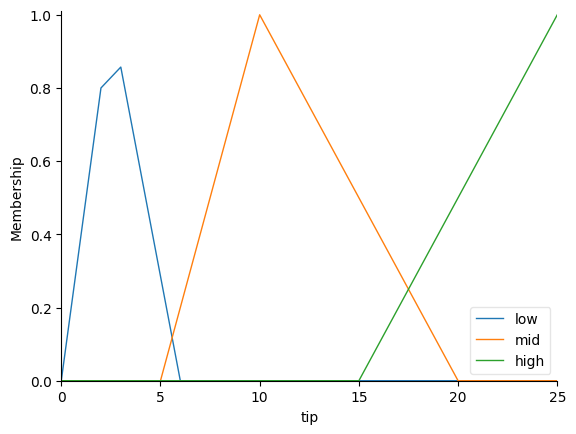

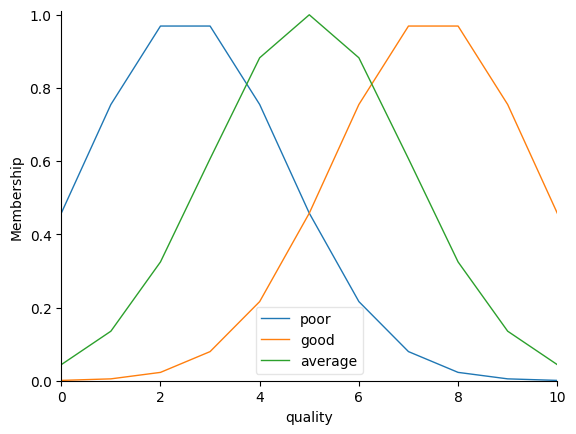

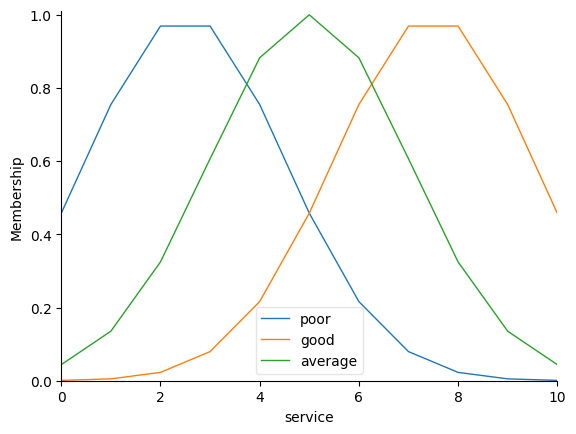

In [63]:
tip.view()
quality.view()
service.view()

### Remark the selected MFs


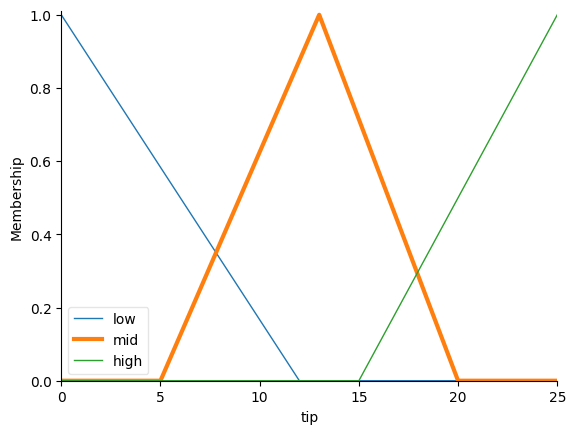

In [43]:
tip['mid'].view()

## Fuzzy Rules

1. If the food is poor AND the service is poor, THEN the tip is low
2. If the food is poor OR the service is average, THEN the tip is low
3. If the food is poor AND the service is good, THEN the tip is low

4. If the food is average AND the service is poor, THEN the tip is mid
5. If the food is average OR the service is average, THEN the tip is mid
6. If the food is average OR the service is good, THEN the tip is mid

7. If the food is good AND the service is poor, THEN the tip is mid
8. If the food is good AND the service is average, THEN the tip is high
9. If the food is good AND the service is good, THEN the tip is high

- OR: |
- AND: &
- NOT: ~

In [64]:
rule1 = ctrl.Rule(quality['poor'] & service['poor'], tip['low'])
rule2 = ctrl.Rule(quality['poor'] | service['average'], tip['low'])
rule3 = ctrl.Rule(quality['poor'] & service['good'], tip['low'])

rule4 = ctrl.Rule(quality['average'] & service['poor'], tip['mid'])
rule5 = ctrl.Rule(quality['average'] | service['average'], tip['mid'])
rule6 = ctrl.Rule(quality['average'] | service['good'], tip['mid'])

rule7 = ctrl.Rule(quality['good'] & service['poor'], tip['mid'])
rule8 = ctrl.Rule(quality['good'] & service['average'], tip['high'])
rule9 = ctrl.Rule(quality['good'] & service['good'], tip['high'])

### Create Inference Block

In [65]:
tipping_inference = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])

# Our FIS: The Whole Fuzzy Inference System
tipping_fis = ctrl.ControlSystemSimulation(tipping_inference)

### Test Case 1 LOW

In [68]:
tipping_fis.inputs({'quality': 1, 'service': 0})
tipping_fis.compute()
tipping_fis.output['tip']

6.762856515596187

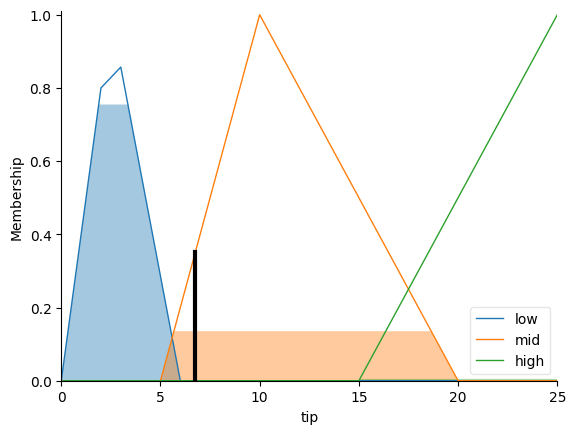

In [69]:
tip.view(sim = tipping_fis)

### Test Case 2 MID

In [70]:
tipping_fis.inputs({'quality': 5, 'service': 4.5})
tipping_fis.compute()
tipping_fis.output['tip']

11.954837965649256

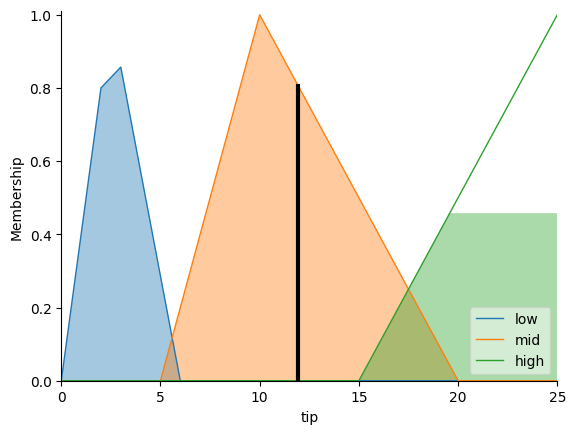

In [71]:
tip.view(sim = tipping_fis)

### Test Case 3 HIGH

In [73]:
tipping_fis.inputs({'quality': 10, 'service': 9.5})
tipping_fis.compute()
tipping_fis.output['tip']

14.392840120576391

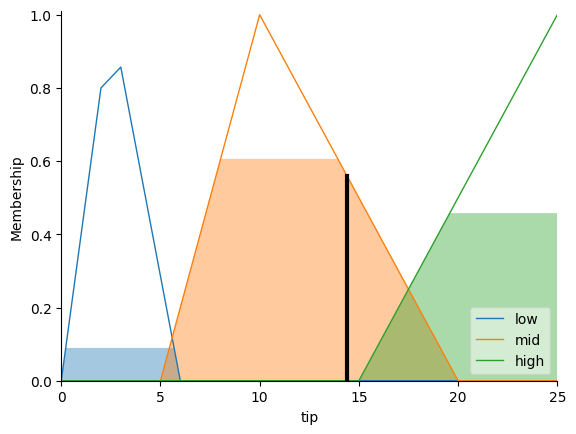

In [74]:
tip.view(sim = tipping_fis)

### How could we be sure that this solution is the best?

Basically, since we are the ones declaring the membership functions, changing from triangular to Gaussian functions implies greater precision, as Gaussian functions are often used more frequently for membership. On the other hand, having a greater number of rules allows us to have more possibilities and a better controller, as we have a larger set of constraints.

### What would happen if the antecedents had 5 or 7 linguistic terms?

In that case, our controller would depend on a greater number of input variables, which could make its response much more precise; or, on the other hand, it could enable a greater number of actions considering the variety of antecedents and variations they would have.